In [ ]:
!pip install keras-ocr

     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 9.5MB 6.0MB/s 
     |████████████████████████████████| 860kB 33.8MB/s 
     |████████████████████████████████| 133kB 42.3MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
  Created wheel for keras-ocr: filename=keras_ocr-0.8.6-cp37-none-any.whl size=42937 sha256=25615b77d4ccb06a81bc04a4bb6f5bf5623e5a796307692cbb4008cfb7e6d9d4
  Stored in directory: /root/.cache/pip/wheels/79/59/e6/79dd15333b911d51ea68d7e4c325e14f042eacc141201dca44
Successfully built keras-ocr


In [ ]:
data_dir = '.'

import os
import math
import imgaug
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import tensorflow as tf

import keras_ocr

dataset = keras_ocr.datasets.get_icdar_2013_detector_dataset(
    cache_dir='.',
    skip_illegible=False
)

Looking for ./icdar2013/Challenge2_Training_Task12_Images.zip
Looking for ./icdar2013/Challenge2_Training_Task2_GT.zip


In [ ]:
dataset

[('./icdar2013/Challenge2_Training_Task12_Images/229.jpg',
  [[(array([[231,  80],
            [282,  80],
            [282, 141],
            [231, 141]]), 'N'), (array([[302,  82],
            [341,  82],
            [341, 142],
            [302, 142]]), 'E'), (array([[354,  83],
            [423,  83],
            [423, 143],
            [354, 143]]), 'W')], [(array([[146, 164],
            [189, 164],
            [189, 223],
            [146, 223]]), 'T'), (array([[200, 164],
            [242, 164],
            [242, 224],
            [200, 224]]), 'R'), (array([[252, 165],
            [303, 165],
            [303, 225],
            [252, 225]]), 'A'), (array([[317, 167],
            [354, 167],
            [354, 226],
            [317, 226]]), 'F'), (array([[367, 167],
            [404, 167],
            [404, 227],
            [367, 227]]), 'F'), (array([[416, 168],
            [427, 168],
            [427, 227],
            [416, 227]]), 'I'), (array([[442, 167],
            [49

In [ ]:
train, validation = sklearn.model_selection.train_test_split(
    dataset, train_size=0.8, random_state=42
)
augmenter = imgaug.augmenters.Sequential([
    imgaug.augmenters.Affine(
    scale=(1.0, 1.2),
    rotate=(-5, 5)
    ),
    imgaug.augmenters.GaussianBlur(sigma=(0, 0.5)),
    imgaug.augmenters.Multiply((0.8, 1.2), per_channel=0.2)
])
generator_kwargs = {'width': 640, 'height': 640}
training_image_generator = keras_ocr.datasets.get_detector_image_generator(
    labels=train,
    augmenter=augmenter,
    **generator_kwargs
)
validation_image_generator = keras_ocr.datasets.get_detector_image_generator(
    labels=validation,
    **generator_kwargs
)

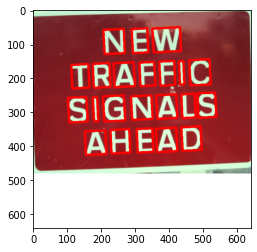

In [ ]:
image, lines, confidence = next(training_image_generator)
canvas = keras_ocr.tools.drawBoxes(image=image, boxes=lines, boxes_format='lines')
plt.imshow(canvas)

In [ ]:
detector = keras_ocr.detection.Detector()

batch_size = 1
training_generator, validation_generator = [
    detector.get_batch_generator(
        image_generator=image_generator, batch_size=batch_size
    ) for image_generator in
    [training_image_generator, validation_image_generator]
]
detector.model.fit_generator(
    generator=training_generator,
    steps_per_epoch=math.ceil(len(train) / batch_size),
    epochs=1000,
    workers=0,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(restore_best_weights=True, patience=5),
        tf.keras.callbacks.CSVLogger(os.path.join(data_dir, 'detector_icdar2013.csv')),
        tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(data_dir, 'detector_icdar2013.h5'))
    ],
    validation_data=validation_generator,
    validation_steps=math.ceil(len(validation) / batch_size)
)

### license plate detector 데이터셋에 맞게 CRAFT 파라미터 Fine-Tuning

Reference : https://github.com/faustomorales/keras-ocr/blob/master/keras_ocr/datasets.py#L178




In [ ]:
dataset

[('./icdar2013/Challenge2_Training_Task12_Images/229.jpg',
  [[(array([[231,  80],
            [282,  80],
            [282, 141],
            [231, 141]]), 'N'), (array([[302,  82],
            [341,  82],
            [341, 142],
            [302, 142]]), 'E'), (array([[354,  83],
            [423,  83],
            [423, 143],
            [354, 143]]), 'W')], [(array([[146, 164],
            [189, 164],
            [189, 223],
            [146, 223]]), 'T'), (array([[200, 164],
            [242, 164],
            [242, 224],
            [200, 224]]), 'R'), (array([[252, 165],
            [303, 165],
            [303, 225],
            [252, 225]]), 'A'), (array([[317, 167],
            [354, 167],
            [354, 226],
            [317, 226]]), 'F'), (array([[367, 167],
            [404, 167],
            [404, 227],
            [367, 227]]), 'F'), (array([[416, 168],
            [427, 168],
            [427, 227],
            [416, 227]]), 'I'), (array([[442, 167],
            [49

In [ ]:
type(dataset)

list

In [ ]:
dataset[0]

('./icdar2013/Challenge2_Training_Task12_Images/229.jpg', [[(array([[231,  80],
           [282,  80],
           [282, 141],
           [231, 141]]), 'N'), (array([[302,  82],
           [341,  82],
           [341, 142],
           [302, 142]]), 'E'), (array([[354,  83],
           [423,  83],
           [423, 143],
           [354, 143]]), 'W')], [(array([[146, 164],
           [189, 164],
           [189, 223],
           [146, 223]]), 'T'), (array([[200, 164],
           [242, 164],
           [242, 224],
           [200, 224]]), 'R'), (array([[252, 165],
           [303, 165],
           [303, 225],
           [252, 225]]), 'A'), (array([[317, 167],
           [354, 167],
           [354, 226],
           [317, 226]]), 'F'), (array([[367, 167],
           [404, 167],
           [404, 227],
           [367, 227]]), 'F'), (array([[416, 168],
           [427, 168],
           [427, 227],
           [416, 227]]), 'I'), (array([[442, 167],
           [493, 167],
           [493, 230],

In [ ]:
type(dataset[0])

tuple

In [ ]:
dataset[0][1]

[[(array([[231,  80],
          [282,  80],
          [282, 141],
          [231, 141]]), 'N'), (array([[302,  82],
          [341,  82],
          [341, 142],
          [302, 142]]), 'E'), (array([[354,  83],
          [423,  83],
          [423, 143],
          [354, 143]]), 'W')], [(array([[146, 164],
          [189, 164],
          [189, 223],
          [146, 223]]), 'T'), (array([[200, 164],
          [242, 164],
          [242, 224],
          [200, 224]]), 'R'), (array([[252, 165],
          [303, 165],
          [303, 225],
          [252, 225]]), 'A'), (array([[317, 167],
          [354, 167],
          [354, 226],
          [317, 226]]), 'F'), (array([[367, 167],
          [404, 167],
          [404, 227],
          [367, 227]]), 'F'), (array([[416, 168],
          [427, 168],
          [427, 227],
          [416, 227]]), 'I'), (array([[442, 167],
          [493, 167],
          [493, 230],
          [442, 230]]), 'C')], [(array([[134, 246],
          [180, 246],
          [1

In [ ]:
type(dataset[0][1])

list

In [ ]:
dataset[0][1][0]

[(array([[231,  80],
         [282,  80],
         [282, 141],
         [231, 141]]), 'N'), (array([[302,  82],
         [341,  82],
         [341, 142],
         [302, 142]]), 'E'), (array([[354,  83],
         [423,  83],
         [423, 143],
         [354, 143]]), 'W')]

In [ ]:
type(dataset[0][1][0])

list

In [ ]:
dataset[0][1][0][0]

(array([[231,  80],
        [282,  80],
        [282, 141],
        [231, 141]]), 'N')

In [ ]:
type(dataset[0][1][0][0])

tuple

In [ ]:
dataset[0][1][0][0][0]

array([[231,  80],
       [282,  80],
       [282, 141],
       [231, 141]])

In [ ]:
type(dataset[0][1][0][0][0])

numpy.ndarray

In [ ]:
dataset[0][1][0][0][0].shape

(4, 2)

In [ ]:
import glob

In [ ]:
data_dir = '.'

In [ ]:
!unzip license_plate_detection_data.zip

Archive:  license_plate_detection_data.zip
   creating: license_plate_detection_data/
   creating: license_plate_detection_data/images/
  inflating: license_plate_detection_data/images/wts-lg-000087.jpg  
  inflating: license_plate_detection_data/images/wts-lg-000088.jpg  
  inflating: license_plate_detection_data/images/wts-lg-000089.jpg  
  inflating: license_plate_detection_data/images/wts-lg-000090.jpg  
  inflating: license_plate_detection_data/images/wts-lg-000091.jpg  
  inflating: license_plate_detection_data/images/wts-lg-000094.jpg  
  inflating: license_plate_detection_data/images/wts-lg-000095.jpg  
  inflating: license_plate_detection_data/images/wts-lg-000096.jpg  
  inflating: license_plate_detection_data/images/wts-lg-000097.jpg  
  inflating: license_plate_detection_data/images/wts-lg-000098.jpg  
  inflating: license_plate_detection_data/images/wts-lg-000099.jpg  
  inflating: license_plate_detection_data/images/wts-lg-000100.jpg  
  inflating: license_plate_detection

### license plate data를 읽어오는 함수

In [ ]:
def get_licenseplate_detector_dataset(cache_dir=None):
  """
  Args:
      cache_dir: The directory in which to store the data.
  Returns:
      Lists of (image_path, lines, confidence) tuples. Confidence
      is always 1 for this dataset. We record confidence to allow
      for future support for weakly supervised cases.
  """
  if cache_dir == None:
    raise ValueError('cache_dir is None')

  main_dir = os.path.join(cache_dir, 'license_plate_detection_data')
  training_images_dir = os.path.join(main_dir, 'images')
  training_gt_dir = os.path.join(main_dir, 'annotations')

  dataset = []
  for gt_filepath in glob.glob(os.path.join(training_gt_dir, '*.txt')):
    image_id = os.path.split(gt_filepath)[1].split('.')[0]
    image_path = os.path.join(training_images_dir, image_id + '.jpg')
    lines = []
    with open(gt_filepath, 'r') as f:
      for row in f.read().split('\n'):
        current_line = []
        row = row.split(' ')
        character = row[-1][1:-1]

        x1, y1, x2, y1, x2, y2, x1, y2 = map(int, row[:8])
        current_line.append((np.array([[x1, y1], [x2, y1], [x2, y2], [x1, y2]]), character))
        lines.append(current_line)

    # Some lines only have illegible characters and if skip_illegible is True,
    # then these lines will be blank.
    lines = [line for line in lines if line]
    dataset.append((image_path, lines, 1))

  return dataset

In [ ]:
dataset = get_licenseplate_detector_dataset(cache_dir='.')

In [ ]:
# train and validation data split
train, validation = sklearn.model_selection.train_test_split(
  dataset, train_size=0.8, random_state=42
)

# set augmenter
augmenter = imgaug.augmenters.Sequential([
  imgaug.augmenters.Affine(
    scale=(1.0, 1.2),
    rotate=(-5, 5)
  ),
  imgaug.augmenters.GaussianBlur(sigma=(0, 0.5)),
  imgaug.augmenters.Multiply((0.8, 1.2), per_channel=0.2)
])

# set training and validation generator
generator_kwargs = {'width': 640, 'height': 640}
training_image_generator = keras_ocr.datasets.get_detector_image_generator(
  labels=train,
  augmenter=augmenter,
  **generator_kwargs
)
validation_image_generator = keras_ocr.datasets.get_detector_image_generator(
  labels=validation,
  **generator_kwargs
)

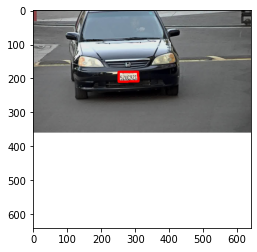

In [ ]:
# draw one sample training image for sanity check
image, lines, confidence = next(training_image_generator)
canvas = keras_ocr.tools.drawBoxes(image=image, boxes=lines, boxes_format='lines')
plt.imshow(canvas)

In [ ]:
# set detector and start training
detector = keras_ocr.detection.Detector()
# restore model weights
loading_model_path = os.path.join(data_dir, 'detector_carplate.h5')
if os.path.isfile(loading_model_path) == True:
  detector.model.load_weights(loading_model_path)
  print(loading_model_path + ' model loaded!')

Looking for /root/.keras-ocr/craft_mlt_25k.h5
./detector_carplate.h5 model loaded!


### License Plate Detection 데이터에 맞게 Fine-Tuning

In [ ]:
batch_size = 1
training_generator, validation_generator = [
  detector.get_batch_generator(
    image_generator=image_generator, batch_size=batch_size
  ) for image_generator in
  [training_image_generator, validation_image_generator]
]
detector.model.fit_generator(
  generator=training_generator,
  steps_per_epoch=math.ceil(len(train) / batch_size),
  epochs=1000,
  workers=0,
  callbacks=[
    tf.keras.callbacks.CSVLogger(os.path.join(data_dir, 'detector_carplate.csv'), append=True),
    tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(data_dir, 'detector_carplate.h5'))
  ],
  validation_data=validation_generator,
  validation_steps=math.ceil(len(validation) / batch_size)
)

In [ ]:
from google.colab import files
files.download("/content/detector_carplate.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("/content/detector_carplate.csv")

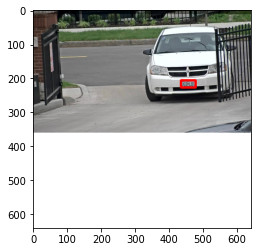

In [ ]:
# draw one sample training image for sanity check
image, lines, confidence = next(validation_image_generator)
canvas = keras_ocr.tools.drawBoxes(image=image, boxes=lines, boxes_format='lines')
plt.imshow(canvas)

In [ ]:
!mkdir craft_license_plate_validation_result

In [ ]:
validation

[('./license_plate_detection_data/images/wts-lg-000071.jpg',
  [[(array([[337, 536],
            [397, 536],
            [397, 566],
            [337, 566]]), 'WSG979')]],
  1),
 ('./license_plate_detection_data/images/wts-lg-000117.jpg',
  [[(array([[713, 498],
            [811, 498],
            [811, 547],
            [713, 547]]), 'D315771')]],
  1),
 ('./license_plate_detection_data/images/wts-lg-000149.jpg',
  [[(array([[602, 247],
            [688, 247],
            [688, 290],
            [602, 290]]), '6MWF778')]],
  1),
 ('./license_plate_detection_data/images/wts-lg-000012.jpg',
  [[(array([[571, 283],
            [691, 283],
            [691, 343],
            [571, 343]]), 'CK0A1F')]],
  1),
 ('./license_plate_detection_data/images/33fa5185-0286-4e8f-b775-46162eba39d4.jpg',
  [[(array([[666, 125],
            [724, 125],
            [724, 154],
            [666, 154]]), 'R820503')]],
  1),
 ('./license_plate_detection_data/images/d4f79480-366a-40b6-ab2c-328bcba705b2.jpg',


In [ ]:
import imageio

output_folder = 'craft_license_plate_validation_result'

for image_path, _, _ in validation:
  image = keras_ocr.tools.read(image_path)

  output_image_path = os.path.join(output_folder, image_path.split('/')[-1])

  # detector prediction
  pred_boxes = detector.detect(np.expand_dims(image, axis=0))

  for each_pred in pred_boxes[0]:
    left, top = each_pred[0]
    right, bottom = each_pred[2]
    canvas = cv2.rectangle(image, (left, top), (right, bottom), (0,255,0), 3)

  imageio.imwrite(output_image_path, canvas)
  print(output_image_path + ' saved!' )

craft_license_plate_validation_result/wts-lg-000071.jpg saved!
craft_license_plate_validation_result/wts-lg-000117.jpg saved!
craft_license_plate_validation_result/wts-lg-000149.jpg saved!
craft_license_plate_validation_result/wts-lg-000012.jpg saved!
craft_license_plate_validation_result/33fa5185-0286-4e8f-b775-46162eba39d4.jpg saved!
craft_license_plate_validation_result/d4f79480-366a-40b6-ab2c-328bcba705b2.jpg saved!
craft_license_plate_validation_result/wts-lg-000094.jpg saved!
craft_license_plate_validation_result/wts-lg-000142.jpg saved!
craft_license_plate_validation_result/wts-lg-000049.jpg saved!
craft_license_plate_validation_result/wts-lg-000017.jpg saved!
craft_license_plate_validation_result/car5.jpg saved!
craft_license_plate_validation_result/wts-lg-000027.jpg saved!
craft_license_plate_validation_result/wts-lg-000127.jpg saved!
craft_license_plate_validation_result/wts-lg-000010.jpg saved!
craft_license_plate_validation_result/wts-lg-000047.jpg saved!
craft_license_plat

### 예측결과 압축후 다운로드

In [ ]:
!zip -r /content/craft_license_plate_validation_result.zip /content/craft_license_plate_validation_result

  adding: content/craft_license_plate_validation_result/ (stored 0%)
  adding: content/craft_license_plate_validation_result/wts-lg-000017.jpg (deflated 11%)
  adding: content/craft_license_plate_validation_result/wts-lg-000136.jpg (deflated 1%)
  adding: content/craft_license_plate_validation_result/car14.jpg (deflated 1%)
  adding: content/craft_license_plate_validation_result/wts-lg-000071.jpg (deflated 11%)
  adding: content/craft_license_plate_validation_result/wts-lg-000098.jpg (deflated 10%)
  adding: content/craft_license_plate_validation_result/wts-lg-000170.jpg (deflated 0%)
  adding: content/craft_license_plate_validation_result/wts-lg-000010.jpg (deflated 0%)
  adding: content/craft_license_plate_validation_result/wts-lg-000149.jpg (deflated 0%)
  adding: content/craft_license_plate_validation_result/wts-lg-000127.jpg (deflated 0%)
  adding: content/craft_license_plate_validation_result/wts-lg-000024.jpg (deflated 9%)
  adding: content/craft_license_plate_validation_result/

In [ ]:
from google.colab import files
files.download("/content/craft_license_plate_validation_result.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>